<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Function-Definition" data-toc-modified-id="Function-Definition-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Function Definition</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Amount-per-Transaction" data-toc-modified-id="Amount-per-Transaction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Amount per Transaction</a></span></li><li><span><a href="#Time-Between-Transactions" data-toc-modified-id="Time-Between-Transactions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Time Between Transactions</a></span></li><li><span><a href="#Same-Amount-Transactions" data-toc-modified-id="Same-Amount-Transactions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Same Amount Transactions</a></span></li></ul></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Splitting-Data" data-toc-modified-id="Splitting-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Splitting Data</a></span></li><li><span><a href="#Under-Sampling" data-toc-modified-id="Under-Sampling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Under Sampling</a></span><ul class="toc-item"><li><span><a href="#Splitting-Undersampled-Data" data-toc-modified-id="Splitting-Undersampled-Data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Splitting Undersampled Data</a></span></li><li><span><a href="#Training-Models" data-toc-modified-id="Training-Models-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Training Models</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Undersampled-Training-Set" data-toc-modified-id="Undersampled-Training-Set-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Undersampled Training Set</a></span></li><li><span><a href="#Undersampled-Test-Set" data-toc-modified-id="Undersampled-Test-Set-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Undersampled Test Set</a></span></li><li><span><a href="#Original-Test-Set" data-toc-modified-id="Original-Test-Set-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>Original Test Set</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-7.3.4"><span class="toc-item-num">7.3.4&nbsp;&nbsp;</span>ROC Curve</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Original-x-Undersampled" data-toc-modified-id="Original-x-Undersampled-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Original x Undersampled</a></span></li><li><span><a href="#Threshold" data-toc-modified-id="Threshold-7.4.2"><span class="toc-item-num">7.4.2&nbsp;&nbsp;</span>Threshold</a></span></li></ul></li></ul></li></ul></div>

# Credit Card Fraud Transactions

In this kernel we will explore a dataset of credit card transactions in wich we have some fraudulent ones. The goal is to understand and gain insights from data and build solutions for a skewed dataset with high percentage of negative class and very low percentagem for positive class.

**Considerations:**

* This dataset has 31 columns and 28 of them are result of a PCA process, and so we have little information about them;
* The other features we can understand are `Time` and `Amount` that explain, in order, the seconds between the transaction and the first transaction in dataset and the amount of transaction.
* Finally we have a `Class` label for this Supervised Learning problem.
* Fraud detection is a very usefull case because in general, it sets up unbalanced datasets (real life problems) and it demands specific analysis with metrics like `precision`, `recall`, `ROC Curve`, and others that we certainlty will handle during work.

## Objective

The main reason I choose this Kaggle project is to learn how to work on unbalanced datasets. The objective here is to come up with concepts for handle this kind of problem. The kernel pipeline:

* Simple **EDA** to look for fraud patterns;
* Unbalanced approach: **Under Sampling**;
* Selecting a **classifier**;
* **Logistic Regression** for unbalanaced and balanced dataset;
* Selecting a **Threshold**.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            precision_recall_curve, f1_score, confusion_matrix, roc_curve, \
                            roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

## Function Definition

In [2]:
def format_spines(ax, right_border=True):
    """
    This function sets up custom borders and colors in axis
    """    
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

def count_class(df, title, colors=["#3498db", "#C8391A"]):
    """
    This function plots the percentagem of positive and negative class in the dataset
    """
    fig, ax = plt.subplots()
    ax = sns.countplot(x='Class', data=df, palette=colors)
    format_spines(ax, right_border=False)
    ax.set_title(title, size=14)

    ncount = len(df)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    plt.tight_layout()
    plt.subplots_adjust(top=1.1)
    ax.set_xticklabels(['Non-Fraud', 'Fraud'])
    plt.show()
    
def fit_models(classifiers, X, y):
    """
    This function receive a dictionary of classifiers and a traning set/label
    as input and return another dictionary with models after training
    """
    fitted_models = {}
    for key, model in classifiers.items():
        model.fit(X, y)
        fitted_models[key] = model
        
    return fitted_models

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function set up and plot a Confusion Matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Format plot
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def create_dataset():
    """
    This functions creates a dataframe to keep performance analysis
    """
    attributes = ['acc', 'prec', 'rec', 'f1', 'auc', 'total_time']
    model_performance = pd.DataFrame({})
    for col in attributes:
        model_performance[col] = []
    return model_performance

def model_analysis(classifiers, X, y, df_performance, cv=5, train=True):
    """
    This function brings up a full model evaluation and saves it in a DataFrame object.
    """
    for key, model in classifiers.items():
        t0 = time.time()
        
        # Accuracy, precision, recall and f1_score on training set using cv
        if train:
            acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
            prec = cross_val_score(model, X, y, cv=cv, scoring='precision').mean()
            rec = cross_val_score(model, X, y, cv=cv, scoring='recall').mean()
            f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()
        else:
            y_pred = model.predict(X)
            acc = accuracy_score(y, y_pred)
            prec = precision_score(y, y_pred)
            rec = recall_score(y, y_pred)
            f1 = f1_score(y, y_pred)
        
        # AUC score
        try:
            y_scores = cross_val_predict(model, X, y, cv=5, 
                                     method='decision_function')
        except:
            # Trees don't have decision_function but predict_proba
            y_probas = cross_val_predict(model, X, y, cv=5, 
                                         method='predict_proba')
            y_scores_tree = y_probas[:, 1]
            y_scores = y_scores_tree
        auc = roc_auc_score(y, y_scores)
        
        t1 = time.time()
        delta_time = t1-t0
        model_name = model.__class__.__name__
        
        # Saving on dataframe
        performances = {}
        performances['acc'] = round(acc, 4)
        performances['prec'] = round(prec, 4)
        performances['rec'] = round(rec, 4)
        performances['f1'] = round(f1, 4)
        performances['auc'] = round(auc, 4)
        performances['total_time'] = round(delta_time, 3)
        
        df_performance = df_performance.append(performances, ignore_index=True)
    df_performance.index = classifiers.keys()
    
    return df_performance

def model_confusion_matrix(classifiers, X, y):
    """
    This function computes predictions for all model and plots a confusion matrix
    for each one.
    """
    i = 1
    plt.figure(figsize=(11, 11))
    sns.set(style='white', palette='muted', color_codes=True)
    labels = ['No Fraud', 'Fraud']
    
    # Ploting confusion matrix
    for key, model in classifiers.items(): 
        y_pred = model.predict(X)
        model_cf_mx = confusion_matrix(y, y_pred)

        # Plotando matriz
        model_name = model.__class__.__name__
        plt.subplot(3, 3, i)
        plot_confusion_matrix(model_cf_mx, labels, title=model_name + '\nConfusion Matrix')
        i += 1

    plt.tight_layout()
    plt.show()
    
def plot_roc_curve(fpr, tpr, y, y_scores, auc, label=None):
    """
    This function plots the ROC curve of a model
    """   
    # Showing data
    sns.set(style='white', palette='muted', color_codes=True)
    plt.plot(fpr, tpr, linewidth=2, label=f'{label}, auc={auc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.02, 1.02, -0.02, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve', size=14)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', 
                 xy=(0.5, 0.5), xytext=(0.6, 0.4),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
def plot_precision_vs_recall(precisions, recalls, label=None, color='b'):
    """
    This function plots precision versus recall curve.
    """
    sns.set(style='white', palette='muted', color_codes=True)
    if label=='LogisticRegression':
        plt.plot(recalls, precisions, 'r-', linewidth=2, label=label)
    else:
        plt.plot(recalls, precisions, color=color, linewidth=2, label=label)
    plt.title('Precision versus Recall', fontsize=14)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis([0, 1, 0, 1])
    plt.legend()
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    This function plots precision x recall among different thresholds
    """
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.title('Precision versus Recall - Thresholds', size=14)
    plt.legend(loc='best')
    plt.ylim([0, 1])

## EDA

As said before, I have just two measurable features: `Time` and `Amount`. Obviously, the unbalanced dataset will lead to non-clear conclusions by the way. Meanwhile, the main reason of this simple EDA is to get familiar with data answearing the following questions:

* **Amount per Transaction:**
    - Is there any relationship between zero amount and fraud transactions?
    - What is the mean amount for fraud and non-fraud transactions?
    - What is the amount distribution by transaction class?
    

* **Time Between Transactions:**
    - Is it possible to occur more than one transaction at the same time?
    - Is this relevant for fraud detections?
    - What is the time distribution by transaction class?
 

* **Same Amount per Transaction:**
    - Is there any relationship between transactions with identical amount and fraud?
    

In [3]:
# Reading the data
df = pd.read_csv(r'C:\Users\thiagoPanini\Downloads\datasets\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Dimension
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

This dataset has 284807 rows and 31 columns.


In [5]:
# Is there any null data?
df.isnull().sum().any() if not df.isnull().sum().any() else df.isnull().sum()

False

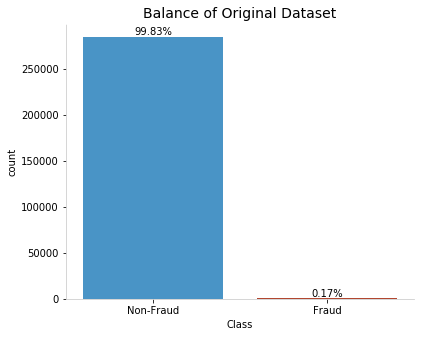

In [6]:
# Let's see the balance of classes
count_class(df, 'Balance of Original Dataset')

### Amount per Transaction

In [7]:
# Some statistics
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Here I have transactions with $\$0,00$ until transactions with $\$25.691,16$. The mean value is $\$88,34$. Just for curiosity, is there anything related with zero amount transactions? Any insight I can gather on this?

We have 1825 transactions with zero amount.
In wich 27 of them are fraud.


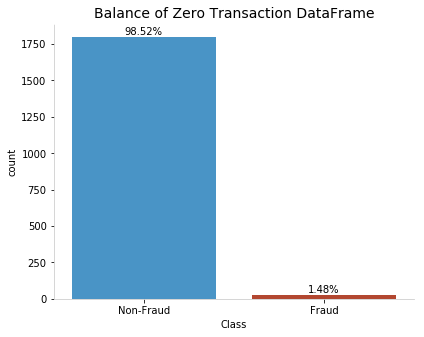

In [8]:
# Zero amount analysis
zero_amount = df[df['Amount']==0]
print(f'We have {len(zero_amount)} transactions with zero amount.')
zero_amount_fraud = zero_amount[zero_amount['Class']==1]
print(f'In wich {len(zero_amount_fraud)} of them are fraud.')

# Let's see the percentage
count_class(zero_amount, 'Balance of Zero Transaction DataFrame')

Besides the balance increase, there is no conclusion of zero amount transactions at all.

In [9]:
# Let's create two more datasets for non-fraud and fraud
fraud_transactions = df.query('Class == 1')
non_fraud_transactions = df.query('Class == 0')
print(f'Fraud: {fraud_transactions.shape[0]}')
print(f'Non-fraud: {non_fraud_transactions.shape[0]}')

Fraud: 492
Non-fraud: 284315


In [10]:
# Amount statistic for fraudulent transactions
fraud_transactions['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
# Amount statistic for non-fraud transactions
non_fraud_transactions['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Numerically, it is possible to say that the mean mount of non fraudulent transactions in this dataset is $\$88.29$, while the mean amount for fraudulent is $\$122.21$. As I said before, this isn't a clear conclusion as long as I have a high unbalanced dataset, but anyway, people expect to link fraud with high amount, so...

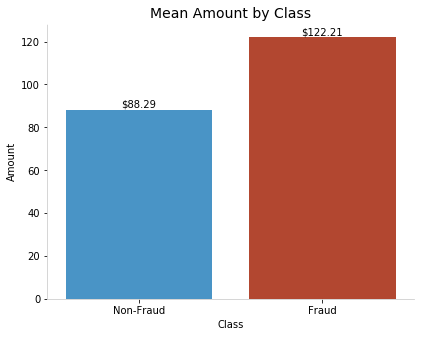

In [12]:
custom_colors = ["#3498db", "#C8391A"]
fig, ax = plt.subplots()
ax = sns.barplot(x='Class', y='Amount', data=df,
                 palette=custom_colors, ci=None)
format_spines(ax, right_border=False)
ax.set_title('Mean Amount by Class', size=14)

ncount = len(df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('${:.2f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.tight_layout()
plt.subplots_adjust(top=1.1)
ax.set_xticklabels(['Non-Fraud', 'Fraud'])
plt.show()

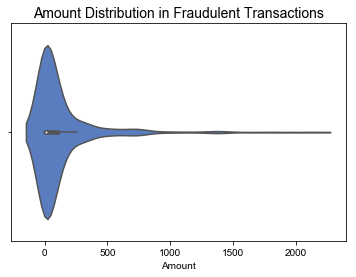

In [13]:
# Preparando gráfico
fig, ax = plt.subplots()
sns.set(style='darkgrid', palette='muted')
ax = sns.violinplot(x='Amount', data=fraud_transactions)
ax.set_title('Amount Distribution in Fraudulent Transactions', size=14)
plt.show()

Let's plot a boxplot to get more intuition. I expect to find many outliers.

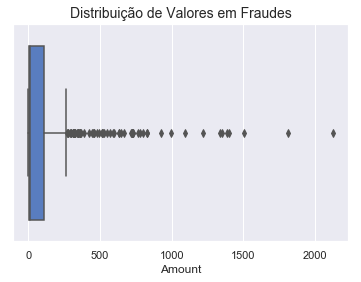

In [14]:
# Boxplot
fig, ax = plt.subplots()
ax = sns.boxplot(fraud_transactions['Amount'])
ax.set_title('Distribuição de Valores em Fraudes', size=14)
plt.show()

### Time Between Transactions

Is there any time pattern in fraudulent transactions?

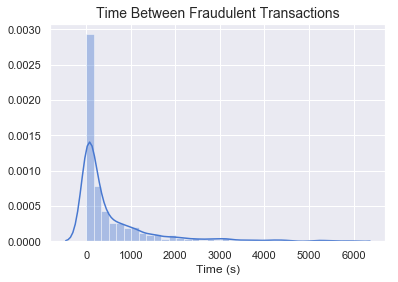

In [15]:
# Computing fraud interval
fraud_idx = list(fraud_transactions.index)
time_fraud = []
for idx in range(len(fraud_idx)):
    if fraud_idx.index(fraud_idx[idx]) == 0:
        pass
    else:
        time_fraud.append(fraud_idx[idx] - fraud_idx[idx-1])

# Time distribution
time_fraud_series = pd.Series(time_fraud)
fig, ax = plt.subplots()
ax = sns.distplot(time_fraud_series)
ax.set_title('Time Between Fraudulent Transactions', size=14)
ax.set_xlabel('Time (s)')
plt.show()

In [16]:
# Statistics
time_fraud_series.describe()

count     491.000000
mean      572.572301
std       940.142245
min         1.000000
25%        34.000000
50%       174.000000
75%       711.000000
max      5907.000000
dtype: float64

In [17]:
# Most common interval
print(f'Most common interval for fraudulent transactions: \n\
{time_fraud_series.mode()[0]} second(s)')

Most common interval for fraudulent transactions: 
1 second(s)


The plot shows the distribution of time between fraudulent transactions. If I take a look in index of `time_fraud` I can see that many frauds occured in a short amount of time (1 , 2 or 3 seconds). Meanwhile, the time statistics above shows there is no pattern between time and fraudulent transactions. It can be proved using the high standard deviation.

_Is there any possibility that transactions registered at exactly the same time are related with fraud? Maybe people who make fraud have knowledge about time transaction and take advantage os this to confuse I.T credit card security._

In [18]:
# Transactions occured at the same time
equal_time = [idx for idx in range(1, len(df)) if df['Time'][idx] == df['Time'][idx-1]]

# Visualizing
idx_equal_test = equal_time[:6]
idx_equal_prev = [x-1 for x in idx_equal_test]
idx_equal = np.unique(np.r_[idx_equal_prev + idx_equal_test])

df.iloc[idx_equal, np.r_[(0, -2, -1)]]

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
5,2.0,3.67,0
7,7.0,40.80,0
8,7.0,93.20,0
10,10.0,7.80,0
11,10.0,9.99,0


It worked! Let's see the fraud percentage in transactions occured at the same time.

In [19]:
# Dataframe with same time transactions
equal_time_prev = [x-1 for x in equal_time]
idx_equal = np.unique(np.r_[equal_time_prev + equal_time])

equal_time_transactions = df.iloc[idx_equal, :]
equal_time_transactions.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [20]:
# Comparison
print(f'We have {len(equal_time_transactions)} occured at the same time.')
print(f'The original dataset has {len(df)} samples.')

We have 239644 occured at the same time.
The original dataset has 284807 samples.


The only thing to say is that many transactions occured at the same time, what is perfectly normal in this context. If I take a look only at the second duplicated-time transaction, maybe I can find a pattern.

Second duplicated time transactions: 160215
In wich 248 are fraud.


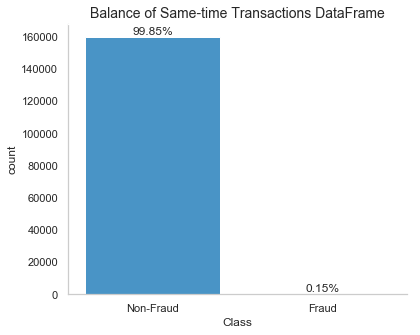

In [21]:
# Second duplicated transacion
equal_time_second_transactions = df.iloc[equal_time, :]
print(f'Second duplicated time transactions: {len(equal_time_second_transactions)}')
second_time_fraud = equal_time_second_transactions.query('Class==1')
print(f'In wich {len(second_time_fraud)} are fraud.')

# Let's see the percentage
count_class(equal_time_second_transactions, 'Balance of Same-time Transactions DataFrame')

The same proportion of the original dataset. No conclusion at all.

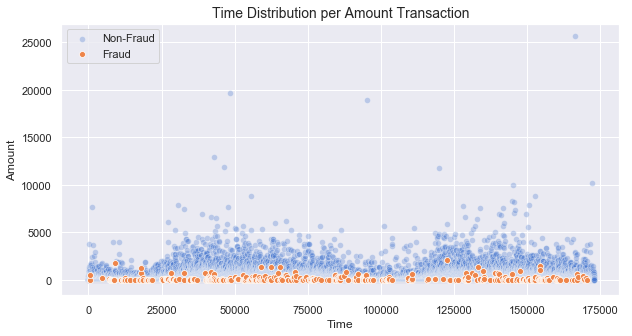

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.scatterplot(x='Time', y='Amount', data=df, alpha=.3, label='Non-Fraud')
ax = sns.scatterplot(x='Time', y='Amount', data=fraud_transactions, label='Fraud')
plt.title('Time Distribution per Amount Transaction', size=14)
plt.legend()
plt.show()

### Same Amount Transactions

Transactions with duplicated amount: 268843
In wich 431 are fraud.


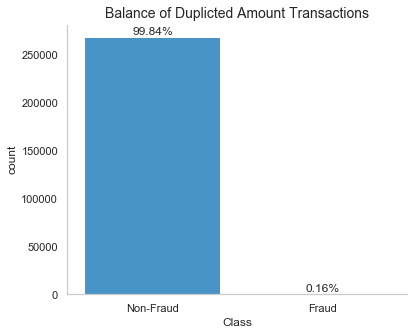

In [23]:
# Sorting amount in dataset
sorted_amount = df.sort_values('Amount')

# Returning only duplicated amount
bool_mask = sorted_amount['Amount'].duplicated(keep=False)
duplicated_amount = sorted_amount[bool_mask]
fraud_duplicated_amount = duplicated_amount.query('Class==1')

print(f'Transactions with duplicated amount: {len(duplicated_amount)}')
print(f'In wich {len(fraud_duplicated_amount)} are fraud.')

# Let's see the percentage
count_class(duplicated_amount, 'Balance of Duplicted Amount Transactions')

The same proportion of the original dataset. No conclusion at all. This is perfectly normal as long as I expect huge duplicated amount in transactions, specially in low values. Maybe if I find a duplicated amount in high fraction of amount, it could be a fraud signal.

**Conclusions:**
I couldn't find any pattern in data related with questions I've made. There is no intuition about amount and time in this dataset that I can go deeper to gather fraud relationship. Meanwhile, this process was great because now I have clear understanding about the data I have in our hands. Let's keep moving forward.

## Scaling

The only two features that aren't scaled yet are `Time` and `Amount`. The others are products of a PCA component. After data exploration, I think `Time` columns won't be necessary for traning models, so it will be dropped.

In [ ]:
# Scaling and dropping
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop('Time', axis=1, inplace=True)

# Result
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Splitting Data

Before we can keep the analysis, I must split the data in train and test subsets so we can measure the performane on original test set. Keeping in mind that I will apply an undarsampling method, it would be good to measure the model performance on a set that **supposedly** is not on the training subset (we will see that this isn't a true fact).

In [ ]:
# Indexing data
X = df.iloc[:, :-1]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Taking a look
print(f'- - - Train set - - -')
print(f'X_train dimension: {X_train.shape}')
print(f'y_train dimension: {y_train.shape}')
print(f'\n- - - Test set - - -')
print(f'X_test dimension: {X_test.shape}')
print(f'y_test dimension: {y_test.shape}')

- - - Train set - - -
X_train dimension: (227845, 29)
y_train dimension: (227845,)

- - - Test set - - -
X_test dimension: (56962, 29)
y_test dimension: (56962,)


In [ ]:
# Looking at the ballance
positive_class_train = sum(y_train == 1)
balance_class_train = positive_class_train / len(y_train)
print(f'Fraud percentage in train set: {100*balance_class_train:.4f}%')

# Verificando balanceamento de classes teste
positive_class_test = sum(y_test == 1)
balance_class_test = positive_class_test / len(y_test)
print(f'Fraud percentage in test set: {100*balance_class_test:.4f}%')

Fraud percentage in train set: 0.1778%
Fraud percentage in test set: 0.1527%


Ok the balance is the same for train and test set. But we have to keep in mind that this is a really unbalanced set. In original dataset, we have just 0.17% fraud samples. It means that if we set a model that predicts that a transactions isn't a fraud all the time, **it would have 99,83% accuracy**! That's why we have to bring up other metrics like `precision`, `recall`, `f1_score`, `ROC curve`, `AUC score`, `confusion matrix` and others.

At this point, I will apply `under-sampling` on data to balance the positive and negative classes, keeping in mind that I will loose information from dataset for sure.

## Under Sampling

In [ ]:
# Intuition
total_fraud = len(fraud_transactions)
total_normal = len(non_fraud_transactions)
print(f'Fraud: {total_fraud}')
print(f'Non-Fraud: {total_normal}')

Fraud: 492
Non-Fraud: 284315


In [ ]:
# Balancing dataset
shuffle_index = np.random.choice(non_fraud_transactions.index, total_fraud, replace=False)
print(f'Non-fraud sampled shuffled: {len(shuffle_index)}')

# Creating new dataframe
undersampled_index = np.concatenate([shuffle_index, fraud_transactions.index])
df_undersampled = df.iloc[undersampled_index, :]
print(f'Samples of new balanced dataset: {len(undersampled_index)}')

# Header
df_undersampled.head()

Non-fraud sampled shuffled: 492
Samples of new balanced dataset: 984


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
125017,-0.997933,0.755058,0.688574,-0.101509,-0.179937,0.288743,0.287447,0.711862,-0.589341,-0.452708,...,0.265138,0.507578,0.007597,-0.310832,-0.572086,0.329265,-0.117124,0.035156,-0.073403,0
106582,1.106808,-0.583363,0.912944,0.731449,-1.416284,-0.746057,-0.519828,-0.128270,-0.808135,0.803902,...,-0.153093,-0.144324,-0.040279,0.671617,0.333189,-0.308583,0.050042,0.055805,0.050577,0
66516,-1.620530,-0.405372,1.370338,-1.930120,-0.128934,0.165592,-0.732050,0.829040,-1.406868,-0.076679,...,0.450239,0.799073,-0.305298,-0.847410,0.565612,-0.109398,0.165940,-0.065490,-0.125338,0
226043,2.111195,-0.650561,-1.174214,-0.744249,-0.572575,-0.549803,-0.903641,-0.070837,-0.341941,0.216429,...,0.282365,0.917563,0.024282,-0.473038,-0.091915,-0.087716,0.030992,-0.021848,-0.253317,0
209788,-0.738225,-1.295854,0.952433,-1.533297,-1.237032,-0.222829,1.413607,-0.354375,-0.601058,-0.230734,...,0.063201,-0.367555,0.962126,-0.049805,-0.669474,-0.690669,-0.122089,-0.009288,1.146972,0


In [ ]:
# Looking for balance
df_undersampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

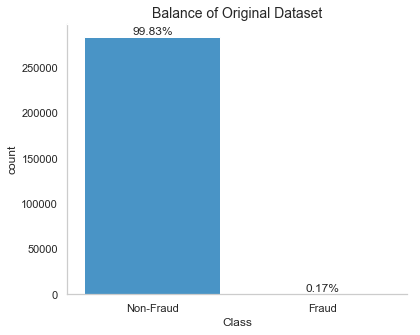

In [ ]:
# Before undersampling
count_class(df, 'Balance of Original Dataset')

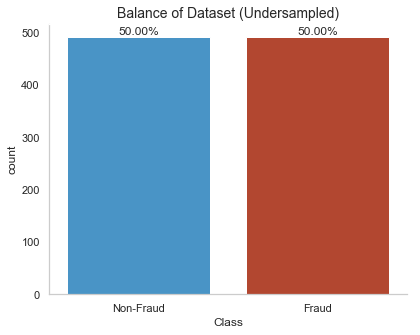

In [ ]:
# After undersampling
count_class(df_undersampled, 'Balance of Dataset (Undersampled)')

Good! Now we can:
* Split the data in undersampled **train** and **test** sets;
* Come up with 6 different **classifiers** to compare performance;
* Evaluate **metrics** mentioned above;
* Evaluate on **undersampled training** set;
* Evaluate on **undersampled test** set;
* Evaluate on **original test** set;
* Choose the **best model** to go deeper;
* Compare between **normal** and **undersampled** training.

### Splitting Undersampled Data

In [ ]:
# Splitting data
X_under = df_undersampled.iloc[:, :-1]
y_under = df_undersampled['Class']
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under,
                                                                           test_size=.2)

# Taking a look
print(f'- - - Train set - - -')
print(f'X_train_under dimension: {X_train_under.shape}')
print(f'y_train_under dimension: {y_train_under.shape}')
print(f'\n- - - Test set - - -')
print(f'X_test_under dimension: {X_test_under.shape}')
print(f'y_test_under dimension: {y_test_under.shape}')

- - - Train set - - -
X_train_under dimension: (787, 29)
y_train_under dimension: (787,)

- - - Test set - - -
X_test_under dimension: (197, 29)
y_test_under dimension: (197,)


In [ ]:
# Verificando balanceamento de classes treino
positive_under_train = sum(y_train_under == 1)
balance_under_train = positive_under_train / len(y_train_under)
print(f'Fraud percentage in undersampled train set: {100*balance_under_train:.4f}%')

# Verificando balanceamento de classes teste
positive_under_test = sum(y_test_under == 1)
balance_under_test = positive_under_test / len(y_test_under)
print(f'Fraud percentage in undersampled train set: {100*balance_under_test:.4f}%')

Fraud percentage in undersampled train set: 49.4282%
Fraud percentage in undersampled train set: 52.2843%


Good balance.

### Training Models

Let's come up with 6 different classifiers:
    * Logistic Regression;
    * Decision Trees Classifier;
    * Random Forest Classifier;
    * SVC Classifier;
    * KNN Classifier;
    * MLP Classifier

In [ ]:
# Classifiers dictionary
classifiers = {
    'log_reg': LogisticRegression(),
    'tree_clf': DecisionTreeClassifier(),
    'forest_clf': RandomForestClassifier(),
    'svm_clf': SVC(),
    'knn_clf': KNeighborsClassifier(),
    'mlp_clf': MLPClassifier()
}

In [ ]:
# Training on undersampled data
fitted_models = fit_models(classifiers, X_train_under, y_train_under)

### Evaluation

#### Undersampled Training Set

In [ ]:
# Creating dataframe to hold metrics
train_performance_under = create_dataset()

# Evaluating models
train_performance_under = model_analysis(fitted_models, X_train_under, y_train_under, 
                                         train_performance_under)

# Result
cm = sns.light_palette("green", as_cmap=True)
train_performance_under.style.background_gradient(cmap=cm)

,acc,prec,rec,f1,auc,total_time
log_reg,0.9352,0.9617,0.9049,0.9323,0.9739,0.277
tree_clf,0.9021,0.8962,0.9126,0.9024,0.9111,0.536
forest_clf,0.9301,0.9695,0.91,0.9295,0.9715,1.012
svm_clf,0.9212,0.9324,0.9075,0.9195,0.9746,0.783
knn_clf,0.9326,0.9722,0.8894,0.9288,0.9684,0.502
mlp_clf,0.9416,0.9598,0.91,0.9313,0.9749,26.848


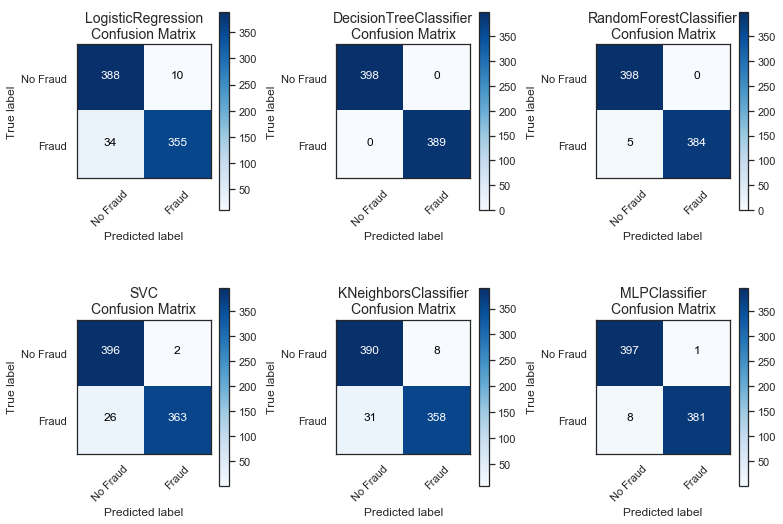

In [ ]:
# Confusion Matrix for each model
model_confusion_matrix(fitted_models, X_train_under, y_train_under)

Here we analysed the models with the same subset we trained them (X_train_under) and so we can get some intuition:
* Decision Trees, Random Forest and MLP Classifier really overfits the data;
* MLP Classifier is our slowest model;
* Logistic Regression is the fastest;
* The best recall score was from Decision Trees, but as we saw, this is the training data.

Let's evaluate the models in the test set undersampled.

#### Undersampled Test Set

In [ ]:
# Creating dataframe to hold metrics
test_performance_under = create_dataset()

# Evaluating models
test_performance_under = model_analysis(fitted_models, X_test_under, y_test_under, 
                                         test_performance_under, train=False)

# Result
cm = sns.light_palette("green", as_cmap=True)
test_performance_under.style.background_gradient(cmap=cm)

,acc,prec,rec,f1,auc,total_time
log_reg,0.934,1,0.8738,0.9326,0.983,0.037
tree_clf,0.9036,0.92,0.8932,0.9064,0.8571,0.054
forest_clf,0.9442,1,0.8932,0.9436,0.9578,0.126
svm_clf,0.9594,1,0.9223,0.9596,0.9704,0.047
knn_clf,0.9391,1,0.8835,0.9381,0.9657,0.046
mlp_clf,0.9492,1,0.9029,0.949,0.9855,1.855


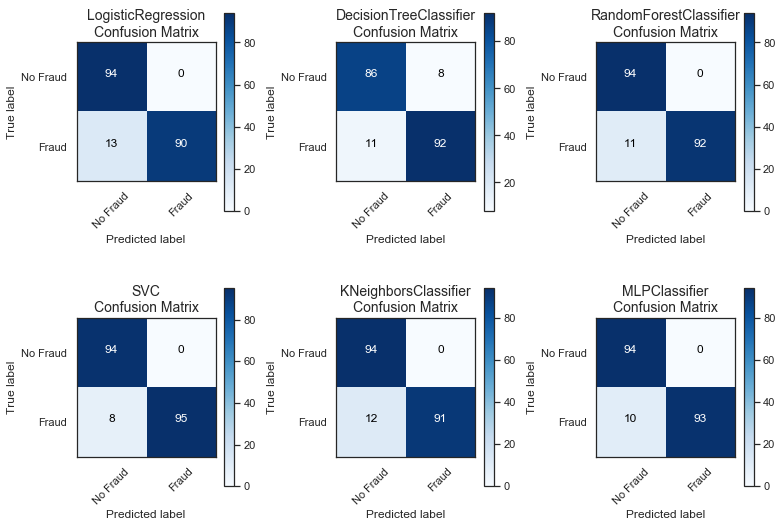

In [ ]:
# Confusion Matrix for each model
model_confusion_matrix(fitted_models, X_test_under, y_test_under)

Here we are close to the true analysis. The Decision Tree had the highest recall among the models, but the lowest AUC score. Let's see this on the original test set.

#### Original Test Set

In [ ]:
# Creating dataframe to hold metrics
test_performance_original = create_dataset()

# Evaluating models
test_performance_original = model_analysis(fitted_models, X_test, y_test, 
                                         test_performance_original, train=False)

# Result
cm = sns.light_palette("green", as_cmap=True)
test_performance_original.style.background_gradient(cmap=cm)

,acc,prec,rec,f1,auc,total_time
log_reg,0.9782,0.0574,0.8621,0.1077,0.9642,5.703
tree_clf,0.9152,0.0169,0.954,0.0332,0.7986,20.591
forest_clf,0.9715,0.0477,0.931,0.0908,0.9017,21.355
svm_clf,0.9533,0.0286,0.8966,0.0554,0.9433,27.983
knn_clf,0.9781,0.0565,0.8506,0.1059,0.8676,137.941
mlp_clf,0.9753,0.0546,0.931,0.1031,0.9436,118.516


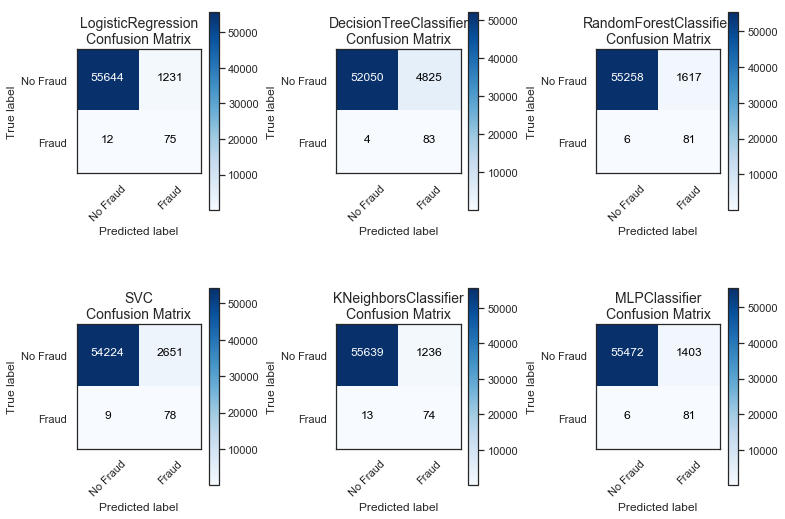

In [ ]:
# Confusion Matrix for each model
model_confusion_matrix(fitted_models, X_test, y_test)

In this analysis, all models were evaluated on original test set (created on **6. Splitting Data**). This is really important because now it's possible to see the model behavior in a huge unbalanced data. This is the time to see if undersampling worked! Before analysis, let's point some explanation about recall:

**Recall:** probably this is the most important metric for this problem. Remember we are about to train a fraud detector, so it is really important to detect as many frauds as possible. But let's keep in mind that there is a trade off between precision and recall in a model. It means that recall improvement comes up with a growth of False Positive number. In other words, it would be more non-fraudulent transactions flagged as fraud.

* **Logistic Regression** presented the fastest analysis and a very good auc. Probably there is space for recall improvement;
* **KNN and MLP** are the slowest models;
* **Decision Trees** presented the slowest precision: the model has the highest number of good transactions classified as fraud (FP);
* **KNN** missclassified the lowest amount of non-fraud as fraud, but it is very slow.

#### ROC Curve

In [ ]:
# Plotando curva ROC
plt.figure(figsize=(11, 6))

for key, model in fitted_models.items():

    # Computing scores with cross_val_predict
    try:
        y_scores = cross_val_predict(model, X_test, y_test, cv=5, 
                                     method='decision_function')
    except:
        # Trees don't have decision_function but predict_proba
        y_probas = cross_val_predict(model, X_test, y_test, cv=5, 
                                     method='predict_proba')
        y_scores_tree = y_probas[:, 1]
        y_scores = y_scores_tree
        
    # ROC Curve
    model_name = model.__class__.__name__
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plot_roc_curve(fpr, tpr, y_test, y_scores, auc, label=model_name)
    plt.suptitle('Original Test Set')

Let's choose **Logistic Regression** as the model we will focus on future analysis.

### Logistic Regression

#### Original x Undersampled

In [ ]:
# Let's train a model with original set
log_reg_original = LogisticRegression()
log_reg_original.fit(X_train, y_train)

In [ ]:
# Let's return our trained logistic regression model with undersampled data
log_reg_undersampled = fitted_models['log_reg']

We are interested on model performance on original test set.

In [ ]:
# Dict of log reg classifiers
logistic_regs = {
    'log_reg_original': log_reg_original,
    'log_reg_undersampled': log_reg_undersampled
}

# Creating dataframe to hold metrics
log_reg_test_performance = create_dataset()

# Evaluating models
log_reg_test_performance = model_analysis(logistic_regs, X_test, y_test, 
                                          log_reg_test_performance, train=False)

# Result
cm = sns.light_palette("green", as_cmap=True)
log_reg_test_performance.style.background_gradient(cmap=cm)

Here we have our two model's behavior on original test set. It is possible to say that:
* **1.** Training without any technique to balance label class leads to a very low recall, and as this metric is the main one (we want to detect as many frauds as possible), this isn't a good idea.
* **2.** On the other hand, using undersampling to balance label class increase recall (good point), but it crashed precision and f1_score. The price for increasing recall is a high amount of False Positives (non-frauds classified as frauds).

Let's take a look at **confusion matrix** to understand better.

In [ ]:
# Comparando matrizes de confusão COM e SEM underesampling nos dados de teste originais

labels = ['No Fraud', 'Fraud']
titles = ['Undersampled', 'Original Dataset']

# Setting up plot
plt.figure(figsize=(8, 4))
sns.set(style='white', palette='muted', color_codes=True)

# Making predictions
under_pred = log_reg_undersampled.predict(X_test)
original_pred = log_reg_original.predict(X_test)
cf_mx_sem_under = confusion_matrix(y_test, original_pred)
cf_mx_com_under = confusion_matrix(y_test, under_pred)

# Plotting
plt.subplot(1, 2, 1)
plot_confusion_matrix(cf_mx_sem_under, labels, title=titles[1],
                      cmap=plt.cm.Reds)
plt.subplot(1, 2, 2)
plot_confusion_matrix(cf_mx_com_under, labels, title=titles[0])

# Final set
plt.tight_layout()
plt.suptitle('Logistic Regression: \nModel Comparison')
plt.subplots_adjust(top=0.82)
plt.show()

As we concluded, the original dataset trained with Logistic Regression have a low recall and misclassifies approx 43 fraudulent transactions (the model they are non-fraud, so this is False Negatives) and this is bad. Meanwhile, this model have just approx 8 False Positives (non-fraud transactions that model said it was fraud).

With undersampling, the model just misclassifies approx 5 frauds as non-frauds (low FN), but misclassifies approx 2000 non-fraud as fraud (high FP). What can be done? Fortunatelly, there is something to do: **threshold!**

#### Threshold

In [ ]:
# Precision x Recall
plt.figure(figsize=(13, 4))

y_scores = cross_val_predict(log_reg_undersampled, X_test, y_test, cv=5, 
                             method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
plt.subplot(1, 2, 1)
plot_precision_vs_recall(precisions, recalls, label='Undersampled', color='b')
plt.subplot(1, 2, 2)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

With these two graphics, it is possible to gather intuition about model limitations in between precision and recall trade-off. If the goal is to get the best recall with good precision, the optimum value is around 0.8 recall and 0.8 precision more or less. Let's try some thresholds to see the best chance.

In [ ]:
# Dataframe for analysis
threshold_metrics = create_dataset()
threshold_metrics.drop(['total_time'], inplace=True, axis=1)

thresholds = np.linspace(-5, 2, 20)
for t in thresholds:
    y_best_recall = np.where(y_scores > t, 1, 0)
    acc = accuracy_score(y_test, y_best_recall)
    recall = recall_score(y_test, y_best_recall)
    precision = precision_score(y_test, y_best_recall)
    f1 = f1_score(y_test, y_best_recall)
    auc = roc_auc_score(y_test, y_best_recall)
    
    # Saving data
    performances = {}
    performances['acc'] = round(acc, 4)
    performances['prec'] = round(precision, 4)
    performances['rec'] = round(recall, 4)
    performances['f1'] = round(f1, 4)
    performances['auc'] = round(auc, 4)
    
    threshold_metrics = threshold_metrics.append\
(performances, ignore_index=True)

In [ ]:
# Returning scores 
threshold_index = [round(t, 2) for t in thresholds]
threshold_metrics.index = threshold_index
cm = sns.light_palette("cornflowerblue", as_cmap=True)
threshold_metrics.style.background_gradient(cmap=cm)

I will try a threshold that equalize precision and recall (t = -2.21)

In [ ]:
# Confusion Matrix with best threshold
t = -3.16
custom_scores = np.where(y_scores > t, 1, 0)
cf_mx = confusion_matrix(y_test, custom_scores)
plt.figure(figsize=(11, 3.5))
plt.subplot(1, 3, 1)
plot_confusion_matrix(cf_mx_sem_under, labels, title='Original Dataset',
                      cmap=plt.cm.Reds)
plt.subplot(1, 3, 2)
plot_confusion_matrix(cf_mx_com_under, labels, title='Undersampled')
plt.subplot(1, 3, 3)
plot_confusion_matrix(cf_mx, labels, title='Custom Threshold',
                      cmap=plt.cm.Greens)
plt.tight_layout()
plt.suptitle(f'Logistic Regression: \nThreshold = {t}')
plt.subplots_adjust(top=0.80)
plt.show()

In [ ]:
cf_mx_thresholds = np.linspace(-5, 0, 9)
i = 1
plt.figure(figsize=(11, 10))
for t in cf_mx_thresholds:
    custom_scores = np.where(y_scores > t, 1, 0)
    cf_mx = confusion_matrix(y_test, custom_scores)
    plt.subplot(3, 3, i)
    plot_confusion_matrix(cf_mx, labels, title=f'Threshold={t}',
                          cmap=plt.cm.Greens)
    i += 1
plt.tight_layout()
plt.suptitle('Threshold Comparison')
plt.subplots_adjust(top=0.93)
plt.show()

In [ ]:
# Precision x Recall
plt.figure(figsize=(10, 5))
i = 1
colors = ['darkgrey', 'gold', 'yellowgreen', 'azure', 'deepskyblue', 'midnightblue',
         'blueviolet', 'violet', 'crimson']
for t in cf_mx_thresholds:
    custom_scores = np.where(y_scores > t, 1, 0)
    precisions, recalls, thresholds = precision_recall_curve(y_test, custom_scores)
    plot_precision_vs_recall(precisions, recalls, label=f'Threshold={t}',
                            color=colors[i-1])
    i+=1

**Conclusion**

The problem provides a really unbalanced dataset and with this kernel it was possible to understand the main challenges about a solution development. Metrics were studied, searches were made and knowledge was gotten! At this final step, it was possible to see how threshold can head the model wherever it has to be and transform metrics according to the problem.

**Future steps**
* Try another Undersampling technique;
* Try Oversampling;
* Try SVM or RandomForest Classifiers